In [14]:
import sys
import os
sys.path.insert(0, os.path.abspath('../..'))
from scipy.io import loadmat
from pathlib import Path
import matplotlib.patches as patches
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
# the following import is required for matplotlib < 3.2:
from mpl_toolkits.mplot3d import Axes3D  # noqa
from scipy import stats
from scipy.stats import mannwhitneyu, ttest_rel
from scipy.signal import butter, filtfilt
import mne
import eeg_analysis.funcs4eeg as fe
import re
import imp
import ast
import behavior.func4behav as fb
imp.reload(fe)
imp.reload(fb)

from scipy import signal
from scipy.signal import resample
from scipy.ndimage import zoom

In [15]:
# # only one case
# case = 'endo valid fast'
# watch = '1 fixation'
# tmin = 0
# tmax = 4 # 1.5+1+0.5+0.05+1.5
# real_ids = [1, 3, 4, 5, 9, 12, 13, 17, 18]
# sham_ids = [2, 6, 7, 8, 10, 11, 14, 15, 16]

# highpass = 4
# lowpass = None

# sham_evoked_before, sham_evoked_after, real_evoked_before, real_evoked_after, _, _ = fe.pipeline_EP_allsubs(case, watch, tmin, tmax, hipass=highpass, lopass=lowpass, baseline=None, detrend=0)

In [16]:
# combine fast and slow
case_title = 'exo'
case_list = [case_title+' fast', case_title+' slow']
tmax_list = [1.5+1+0.5+0.05+1, 1.5+1+1+0.05+1]

# case_title = 'exo'
# case_list = [case_title+' fast', case_title+' slow']
# tmax_list = [1.5+0.033*4+0.5+0.05+1, 1.5+0.033*4+1+0.05+1]

fs = 1200
eeg = np.empty((0, 32, int(tmax_list[0]*fs)+1))
rt = np.empty((0,))
for i, case in enumerate(case_list):
    tmax = tmax_list[i]
    watch = '1 fixation'
    # watch = '11 stim'
    tmin = 0 # include fix or not?

    highpass = 4 # 0.3
    lowpass = 50

    EP_lists, RT_lists = fe.pipeline_EP_RT(case, watch, tmin, tmax, hipass=highpass, lopass=lowpass, baseline=(0,0), move_baseline=False, detrend=1)
    eeg_tmp = np.vstack([EP_lists[0], EP_lists[2]]) # only for all before
    
    # make eeg to same length
    if case=="endo valid slow" or case=="endo invalid slow" or case=="endo slow":
        eeg_tmp = np.concatenate((eeg_tmp[:,:,:int(3*fs)], eeg_tmp[:,:,int(3.5*fs):]), axis=2)
    elif case=="exo valid slow" or case=="exo invalid slow" or case=="exo slow":
        eeg_tmp = np.concatenate((eeg_tmp[:,:,:int((1.5+0.033*4+0.5)*fs)], eeg_tmp[:,:,int((1.5+0.033*4+1)*fs):]), axis=2)

    rt_tmp = np.hstack(RT_lists)

    eeg = np.vstack((eeg, eeg_tmp))
    rt = np.hstack((rt, rt_tmp))


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Filter length: 1981 samples (1.651 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 317 samples (0.264 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Filter length: 1981 samples (1.651 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 317 samples (0.264 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Filter length: 1981 samples (1.651 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 317 samples (0.264 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Filter length: 1981 samples (1.651 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 317 samples (0.264 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Filter length: 1981 samples (1.651 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 317 samples (0.264 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Filter length: 1981 samples (1.651 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 317 samples (0.264 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Filter length: 1981 samples (1.651 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 317 samples (0.264 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Filter length: 1981 samples (1.651 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 317 samples (0.264 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Filter length: 1981 samples (1.651 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 317 samples (0.264 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Filter length: 1981 samples (1.651 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 317 samples (0.264 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Filter length: 1981 samples (1.651 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 317 samples (0.264 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Filter length: 1981 samples (1.651 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 317 samples (0.264 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Filter length: 1981 samples (1.651 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 317 samples (0.264 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Filter length: 1981 samples (1.651 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 317 samples (0.264 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Filter length: 1981 samples (1.651 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 317 samples (0.264 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Filter length: 1981 samples (1.651 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 317 samples (0.264 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Filter length: 1981 samples (1.651 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 317 samples (0.264 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Filter length: 1981 samples (1.651 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 317 samples (0.264 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Filter length: 1981 samples (1.651 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 317 samples (0.264 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Filter length: 1981 samples (1.651 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 317 samples (0.264 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Filter length: 1981 samples (1.651 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 317 samples (0.264 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Filter length: 1981 samples (1.651 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 317 samples (0.264 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Filter length: 1981 samples (1.651 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 317 samples (0.264 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Filter length: 1981 samples (1.651 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 317 samples (0.264 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Filter length: 1981 samples (1.651 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 317 samples (0.264 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Filter length: 1981 samples (1.651 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 317 samples (0.264 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Filter length: 1981 samples (1.651 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 317 samples (0.264 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Filter length: 1981 samples (1.651 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 317 samples (0.264 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Filter length: 1981 samples (1.651 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 317 samples (0.264 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Filter length: 1981 samples (1.651 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 317 samples (0.264 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Filter length: 1981 samples (1.651 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 317 samples (0.264 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Filter length: 1981 samples (1.651 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 317 samples (0.264 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Filter length: 1981 samples (1.651 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 317 samples (0.264 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Filter length: 1981 samples (1.651 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 317 samples (0.264 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Filter length: 1981 samples (1.651 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 317 samples (0.264 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Filter length: 1981 samples (1.651 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 317 samples (0.264 sec)



c:\ProgramData\anaconda3\envs\mne\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


In [17]:
# sham_before = np.vstack(sham_evoked_before)
# sham_after = np.vstack(sham_evoked_after)
# real_before = np.vstack(real_evoked_before)
# real_after = np.vstack(real_evoked_after)

#### Plot one trial wavelet transform

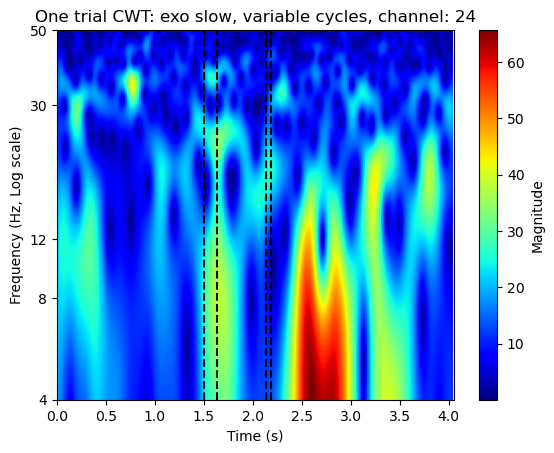

In [18]:
fs = 1200
channel = 24
trial = 10
one_trial = eeg[trial,channel-1,:]*1e6

t = np.linspace(0, len(one_trial)/fs, len(one_trial))

# Logarithmic frequency values
fmin = 4  # Minimum frequency
fmax = 50   # Maximum frequency
num_freqs = 200
freq = np.logspace(np.log10(fmin), np.log10(fmax), num_freqs)
cycles = np.logspace(np.log10(3), np.log10(10), num_freqs)
# cycles = 3
widths = cycles*fs / (2*freq*np.pi)

cwtm_list = []
for f_idx in range(len(freq)):
    cwtm_f = signal.cwt(one_trial, signal.morlet2, [widths[f_idx]], w=cycles[f_idx]).__abs__()
    cwtm_list.append(cwtm_f)
cwtm = np.vstack(cwtm_list)
cwtm = zoom(cwtm, (1, num_freqs/cwtm.shape[1]))

# Plot with logarithmic y-axis (frequency)
plt.imshow(cwtm, origin='lower', aspect='auto', extent=[t.min(), t.max(), freq.min(), freq.max()], cmap='jet')

if 'endo' in case_title:
    plt.axvline(1.5, color='k', linestyle='--')
    plt.axvline(1.5+1, color='k', linestyle='--')
    plt.axvline(1.5+1+0.5, color='k', linestyle='--')
    plt.axvline(1.5+1+0.5+0.05, color='k', linestyle='--')
else:
    plt.axvline(1.5, color='k', linestyle='--')
    plt.axvline(1.5+0.033*4, color='k', linestyle='--')
    plt.axvline(1.5+0.033*4+0.5, color='k', linestyle='--')
    plt.axvline(1.5+0.033*4+0.5+0.05, color='k', linestyle='--')

plt.yscale('log')
plt.colorbar(label='Magnitude')

# Adjust the yticks for log scale
yticks_values = [4, 8, 12, 30, 50]
plt.gca().set_yticks(yticks_values)
plt.gca().set_yticklabels(yticks_values)
# Remove minor ticks
plt.gca().yaxis.set_minor_locator(plt.NullLocator())

plt.ylabel('Frequency (Hz, Log scale)')
plt.xlabel('Time (s)')
plt.title('One trial CWT: '+ case + ', variable cycles'+ ', channel: '+ str(channel))
plt.xlim(t.min(), t.max())
plt.ylim(freq.min(), freq.max())
plt.show()

#### plot one channel wavelet transform, average over trials

In [19]:
# ... [Your other imports and variable definitions]
fs = 1200
channel = 24
# eeg_onechan = sham_before[:,channel-1,:]*1e6
eeg_onechan = eeg[:,channel-1,:]*1e6
t = np.linspace(0, eeg_onechan.shape[1]/fs, eeg_onechan.shape[1])

# Logarithmic frequency values
fmin = 4  # Minimum frequency
fmax = 50   # Maximum frequency
num_freqs = 200

freq = np.logspace(np.log10(fmin), np.log10(fmax), num_freqs)
# Variable number of cycles from 3 to 7 across the frequency range
cycles = np.logspace(np.log10(3), np.log10(7), num_freqs)

# freq = np.linspace(fmin, fmax, num_freqs)
# cycles = np.linspace(3, 7, num_freqs)

# Compute widths for each frequency using the variable number of cycles
widths = cycles * fs / (2 * freq * np.pi)

cwtms = np.empty((eeg_onechan.shape[0], num_freqs, num_freqs))
for trial in range(eeg_onechan.shape[0]):
    one_trial = eeg_onechan[trial,:]
    # Initialize an empty list to store CWT for each frequency
    cwtm_list = []
    for f_idx in range(len(freq)):
        cwtm_f = signal.cwt(one_trial, signal.morlet2, [widths[f_idx]], w=cycles[f_idx]).__abs__()
        cwtm_list.append(cwtm_f)
    cwtm_stacked = np.vstack(cwtm_list)
    cwtm_stacked = zoom(cwtm_stacked, (1, num_freqs/cwtm_stacked.shape[1]))
    cwtms[trial,:,:] = cwtm_stacked
# 5miun30s for num_freqs=600
# 1min47s for num_freqs=200

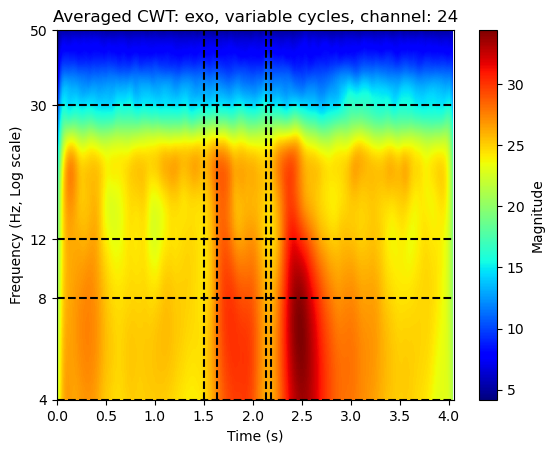

In [20]:
from scipy.stats import lognorm, exponnorm, invgauss
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error
from scipy.stats import ttest_ind, ttest_rel, mannwhitneyu
from pyddm import Model, Sample, Fittable, Fitted
from pyddm.models import DriftConstant, NoiseConstant, BoundConstant, OverlayNonDecision, ICPointSourceCenter, LossRobustLikelihood
from pyddm.functions import fit_adjust_model, display_model

def mean_rm_outlier(data, lower_k, upper_k):
    means = np.empty((data.shape[1], data.shape[2]))
    for i in range(data.shape[1]):
        for j in range(data.shape[2]):
            cleaned_column = fe.rm_outlier(data[:, i, j], lower_k, upper_k)
            means[i,j] = np.mean(cleaned_column)
    return means

def shifted_lognorm(x, s, scale, loc):
    return lognorm.pdf(x, s, loc=loc, scale=scale)

def peak_loc_shift_lognorm(data, cutoff):

    # Estimate initial parameters
    shape, loc, scale = lognorm.fit(data)
    params, _ = curve_fit(shifted_lognorm, np.sort(data), lognorm.pdf(np.sort(data), shape, loc=loc, scale=scale), p0=[shape, scale, loc])
    # Generate x values
    x = np.linspace(0, cutoff, 1000)
    # Get the fitted distribution values
    fitted_values = shifted_lognorm(x, *params)
    # Get the peak location
    peak_loc = x[np.argmax(fitted_values)]
    return peak_loc

def peak_loc_distribution(data):
    means = np.empty((data.shape[1], data.shape[2]))
    for i in range(data.shape[1]):
        for j in range(data.shape[2]):
            print(i, j)
            peak_loc = peak_loc_shift_lognorm(data[:, i, j], cutoff=60)
            means[i,j] = peak_loc
    return means

# cwtm = mean_rm_outlier(cwtms, 1, 10)
cwtm = np.mean(cwtms, axis=0)
# cwtm = peak_loc_distribution(cwtms)

def find_closest_index(array, value):
    """
    Find the index of the closest value in an array.
    """
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

# Plot with logarithmic y-axis (frequency)
# cwtm1 = cwtm[:find_closest_index(freq, 35),:]
plt.imshow(cwtm, origin='lower', aspect='auto', extent=[t.min(), t.max(), freq.min(), freq.max()], 
           cmap='jet')

if 'endo' in case_title:
    plt.axvline(1.5, color='k', linestyle='--')
    plt.axvline(1.5+1, color='k', linestyle='--')
    plt.axvline(1.5+1+0.5, color='k', linestyle='--')
    plt.axvline(1.5+1+0.5+0.05, color='k', linestyle='--')
else:
    plt.axvline(1.5, color='k', linestyle='--')
    plt.axvline(1.5+0.033*4, color='k', linestyle='--')
    plt.axvline(1.5+0.033*4+0.5, color='k', linestyle='--')
    plt.axvline(1.5+0.033*4+0.5+0.05, color='k', linestyle='--')

plt.axhline(4, color='k', linestyle='--')
plt.axhline(8, color='k', linestyle='--')
plt.axhline(12, color='k', linestyle='--')
plt.axhline(30, color='k', linestyle='--')

plt.yscale('log')
# plt.yscale('linear')
plt.colorbar(label='Magnitude')

# Adjust the yticks for log scale
yticks_values = [4, 8, 12, 30, 50]
plt.gca().set_yticks(yticks_values)
plt.gca().set_yticklabels(yticks_values)
# Remove minor ticks
plt.gca().yaxis.set_minor_locator(plt.NullLocator())

plt.ylabel('Frequency (Hz, Log scale)')
plt.xlabel('Time (s)')
plt.title('Averaged CWT: '+ case_title + ', variable cycles'+ ', channel: '+ str(channel))
plt.xlim(t.min(), t.max())
plt.ylim(freq.min(), freq.max())
plt.show()

In [21]:
# plt.hist(cwtms[:,270,295], bins=40)
# plt.xlim(0,60)

#### Normalize by row

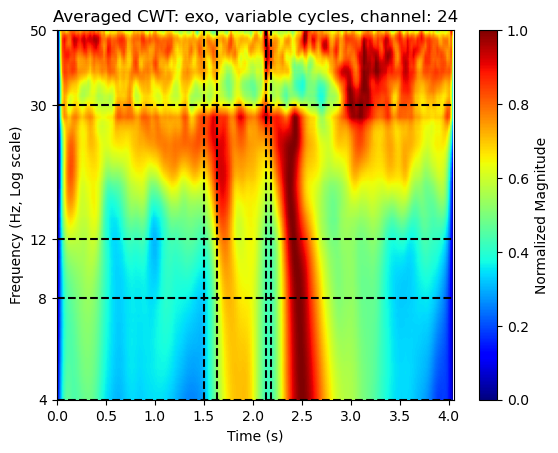

In [22]:
def normalize_by_row(mat):

    row_min = np.min(mat, axis=1)[:, np.newaxis]
    row_max = np.max(mat, axis=1)[:, np.newaxis]

    # Normalize the matrix
    normalized_mat = (mat - row_min) / (row_max - row_min)
    
    return normalized_mat

cwtm_normalized = normalize_by_row(cwtm)
# Plot with logarithmic y-axis (frequency)
plt.imshow(cwtm_normalized, origin='lower', aspect='auto', extent=[t.min(), t.max(), freq.min(), freq.max()], cmap='jet')

if 'endo' in case_title:
    plt.axvline(1.5, color='k', linestyle='--')
    plt.axvline(1.5+1, color='k', linestyle='--')
    plt.axvline(1.5+1+0.5, color='k', linestyle='--')
    plt.axvline(1.5+1+0.5+0.05, color='k', linestyle='--')
else:
    plt.axvline(1.5, color='k', linestyle='--')
    plt.axvline(1.5+0.033*4, color='k', linestyle='--')
    plt.axvline(1.5+0.033*4+0.5, color='k', linestyle='--')
    plt.axvline(1.5+0.033*4+0.5+0.05, color='k', linestyle='--')

plt.axhline(4, color='k', linestyle='--')
plt.axhline(8, color='k', linestyle='--')
plt.axhline(12, color='k', linestyle='--')
plt.axhline(30, color='k', linestyle='--')

plt.yscale('log')
plt.colorbar(label='Normalized Magnitude')

# Adjust the yticks for log scale
yticks_values = [4, 8, 12, 30, 50]
plt.gca().set_yticks(yticks_values)
plt.gca().set_yticklabels(yticks_values)
# Remove minor ticks
plt.gca().yaxis.set_minor_locator(plt.NullLocator())

plt.ylabel('Frequency (Hz, Log scale)')
plt.xlabel('Time (s)')
plt.title('Averaged CWT: '+ case_title + ', variable cycles' + ', channel: '+ str(channel))
plt.xlim(t.min(), t.max())
plt.ylim(freq.min(), freq.max())
plt.show()

#### Normalize by band

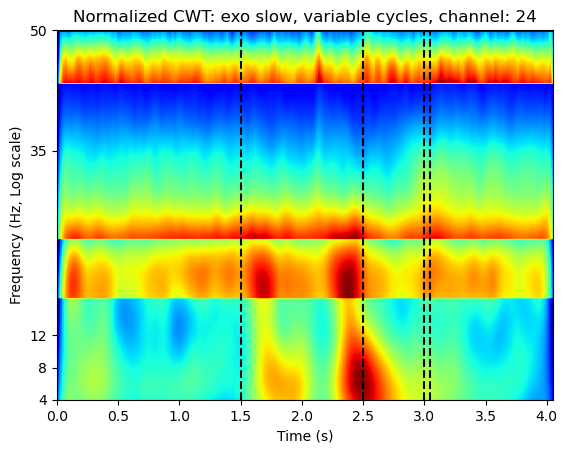

In [23]:
def find_closest_index(array, value):
    """
    Find the index of the closest value in an array.
    """
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

def normalize_by_band(mat, freq_bands):
    normalized_mat = np.empty(mat.shape)
    for band in freq_bands:
        idx_min = find_closest_index(freq, band[0])
        idx_max = find_closest_index(freq, band[1])
        mat_slice = mat[idx_min:idx_max,:]
        band_min = np.min(mat_slice)
        band_max = np.max(mat_slice)
        # Normalize the matrix
        normalized_mat[idx_min:idx_max,:] = (mat_slice - band_min) / (band_max - band_min)
    
    normalized_mat[normalized_mat>1] = 0
    return normalized_mat

freq_bands = [[4, 8], [8, 12], [12, 35], [35, 50]]
cwtm = np.mean(cwtms, axis=0)
cwtm_normalized = normalize_by_band(cwtm, freq_bands)
# Plot with logarithmic y-axis (frequency)
plt.imshow(cwtm_normalized, origin='lower', aspect='auto', extent=[t.min(), t.max(), freq.min(), freq.max()], cmap='jet')

plt.axvline(1.5, color='k', linestyle='--')
plt.axvline(1.5+1, color='k', linestyle='--')
plt.axvline(1.5+1+0.5, color='k', linestyle='--')
plt.axvline(1.5+1+0.5+0.05, color='k', linestyle='--')

# plt.yscale('log')
# plt.colorbar(label='Magnitude')

# Adjust the yticks for log scale
yticks_values = [4, 8, 12, 35, 50]
plt.gca().set_yticks(yticks_values)
plt.gca().set_yticklabels(yticks_values)
# Remove minor ticks
plt.gca().yaxis.set_minor_locator(plt.NullLocator())

plt.ylabel('Frequency (Hz, Log scale)')
plt.xlabel('Time (s)')
plt.title('Normalized CWT: '+ case + ', variable cycles' + ', channel: '+ str(channel))
plt.xlim(t.min(), t.max())
plt.ylim(freq.min(), freq.max())
plt.show()

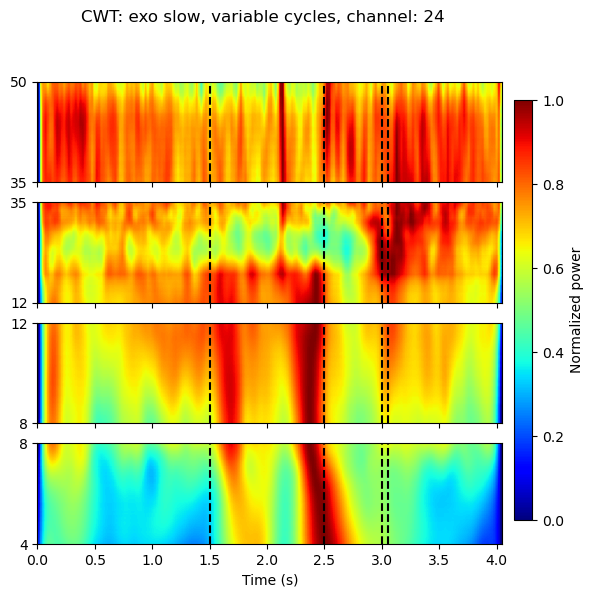

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def normalize_mat(mat):
    row_min = np.min(mat)
    row_max = np.max(mat)

    # Normalize the matrix
    normalized_mat = (mat - row_min) / (row_max - row_min)
    
    return normalized_mat

def normalize_mat_byrow(mat):
    row_min = np.min(mat, axis=1)[:, np.newaxis]
    row_max = np.max(mat, axis=1)[:, np.newaxis]

    # Normalize each row of the matrix
    normalized_mat = (mat - row_min) / (row_max - row_min)
    
    return normalized_mat


def find_closest_index(array, value):
    """
    Find the index of the closest value in an array.
    """
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx


freq_bands = [[4, 8], [8, 12], [12, 35], [35, 50]]

# Create subplots
fig, axs = plt.subplots(len(freq_bands), 1, sharex=True, figsize=(6, 6))

# Adjust spacing between subplots
fig.subplots_adjust(hspace=0.2)
inverse_freq_bands = freq_bands[::-1]
for i, band in enumerate(inverse_freq_bands):
    ax = axs[i]
    idx_start = find_closest_index(freq, band[0])
    idx_end = find_closest_index(freq, band[1])
    cwtm_band = cwtm[idx_start:idx_end,:]

    cwtm_normalized_band = normalize_mat_byrow(cwtm_band)
    im = ax.imshow(cwtm_normalized_band, origin='lower', aspect='auto', extent=[t.min(), t.max(), band[0], band[1]], cmap='jet')
    
    ax.axvline(1.5, color='k', linestyle='--')
    ax.axvline(1.5+1, color='k', linestyle='--')
    ax.axvline(1.5+1+0.5, color='k', linestyle='--')
    ax.axvline(1.5+1+0.5+0.05, color='k', linestyle='--')

    ax.set_yscale('log')
    yticks_values = band
    ax.set_yticks(yticks_values)
    ax.set_yticklabels(yticks_values)
    ax.yaxis.set_minor_locator(plt.NullLocator())
    ax.set_ylim(band[0], band[1])

# Colorbar for the whole figure
cbar_ax = fig.add_axes([0.92, 0.15, 0.03, 0.7])
fig.colorbar(im, cax=cbar_ax, label='Normalized power')

# Set labels and title
axs[-1].set_xlabel('Time (s)')
fig.suptitle('CWT: ' + case + ', variable cycles' + ', channel: ' + str(channel), y=1)

plt.show()

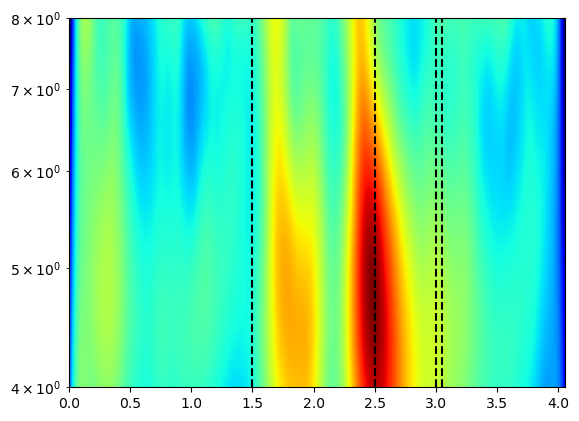

In [25]:
band = [4,8]
idx_start = find_closest_index(freq, band[0])
idx_end = find_closest_index(freq, band[1])
cwtm_band = cwtm[idx_start:idx_end,:]

cwtm_normalized_band = normalize_mat(cwtm_band)
plt.imshow(cwtm_normalized_band, origin='lower', aspect='auto', extent=[t.min(), t.max(), band[0], band[1]], cmap='jet')

plt.axvline(1.5, color='k', linestyle='--')
plt.axvline(1.5+1, color='k', linestyle='--')
plt.axvline(1.5+1+0.5, color='k', linestyle='--')
plt.axvline(1.5+1+0.5+0.05, color='k', linestyle='--')

plt.yscale('log')
# yticks_values = band
# plt.set_yticks(yticks_values)
# plt.set_yticklabels(yticks_values)
# plt.yaxis.set_minor_locator(plt.NullLocator())
# plt.set_ylim(band[0], band[1])
plt.show()

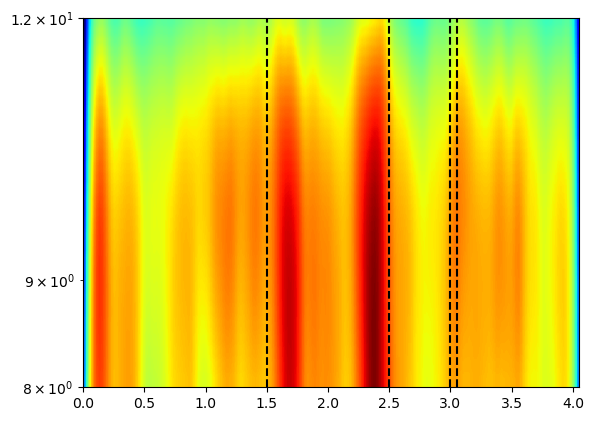

In [26]:
band = [8,12]
idx_start = find_closest_index(freq, band[0])
idx_end = find_closest_index(freq, band[1])
cwtm_band = cwtm[idx_start:idx_end,:]

cwtm_normalized_band = normalize_mat(cwtm_band)
plt.imshow(cwtm_normalized_band, origin='lower', aspect='auto', extent=[t.min(), t.max(), band[0], band[1]], cmap='jet')

plt.axvline(1.5, color='k', linestyle='--')
plt.axvline(1.5+1, color='k', linestyle='--')
plt.axvline(1.5+1+0.5, color='k', linestyle='--')
plt.axvline(1.5+1+0.5+0.05, color='k', linestyle='--')

plt.yscale('log')
yticks_values = band
plt.yticks(yticks_values)
# plt.set_yticklabels(yticks_values)
# plt.yaxis.set_minor_locator(plt.NullLocator())
# plt.set_ylim(band[0], band[1])
plt.show()